<a href="https://colab.research.google.com/github/Tony966012/project-2/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

def m(V):
    x=1/(1+np.exp(-(V+65)/7.8))
    return x
def hinfinity(V):
    x= 1/(1+np.exp((V+81)/11))
    return x
def tao(V):
    x= hinfinity(V)*np.exp((V+162.3)/17.8)
    return x
def S(V, theta,k):
    x= 1/(1+np.exp(-(V-theta)/k))
    return x
def hdot(V,phi,h):
    x= phi*(hinfinity(V)-h)/tao(V)
    return x
def Vdot(C,g_PIR,V,h,V_PIR,g_L,V_L,g_SYN,s,V_SYN):
    x= (-g_PIR*m(V)**3*h*(V-V_PIR)-g_L*(V-V_L)-g_SYN*s*(V-V_SYN))/C
    return x
def alterfiring_neuron1(C,g_PIR,V1,V2,h1,V_PIR,g_L,V_L,g_SYN,V_SYN,theta,k,phi,tstep):
    s=S(V2,theta,k)
    hk1=hdot(V1,phi,h1)
    Vk1=Vdot(C,g_PIR,V1,h1,V_PIR,g_L,V_L,g_SYN,s,V_SYN)
    h_new=h1+tstep*hk1
    V_new=V1+tstep*Vk1
    return h_new,V_new
def alterfiring_neuron2(C,g_PIR,V1,V2,h2,V_PIR,g_L,V_L,g_SYN,V_SYN,theta,k,phi,tstep):
    s=S(V1,theta,k)
    hk1=hdot(V2,phi,h2)
    Vk1=Vdot(C,g_PIR,V2,h2,V_PIR,g_L,V_L,g_SYN,s,V_SYN)
    h_new=h2+tstep*hk1
    V_new=V2+tstep*Vk1
    return h_new,V_new

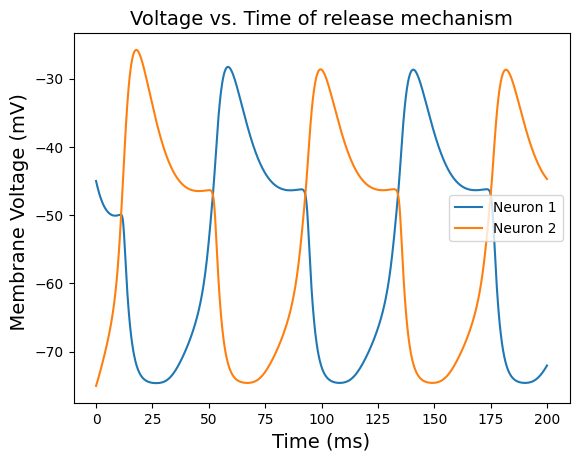

In [2]:
import matplotlib.pyplot as plt

C=1.0
g_PIR=0.3
V_PIR=120
g_L=0.1
V_L=-60
g_SYN=0.3
theta=-44
k=2
V_SYN=-80
phi= 3
#initial conditions



tfinal=200.0
tstep=0.1

V_1=np.zeros(int(tfinal/tstep))
V_2=np.zeros(int(tfinal/tstep))
h_1=np.zeros(int(tfinal/tstep))
h_2=np.zeros(int(tfinal/tstep))

V_1[0]=-45
V_2[0]=-75
h_1[0]=0
h_2[0]=0.25



t=np.arange(0,tfinal,tstep)
for i in range(len(t)-1):

  [h_1[i+1],V_1[i+1]]=alterfiring_neuron1(C,g_PIR,V_1[i],V_2[i],h_1[i],V_PIR,g_L,V_L,g_SYN,V_SYN,theta,k,phi,tstep)
  [h_2[i+1],V_2[i+1]]=alterfiring_neuron2(C,g_PIR,V_1[i],V_2[i],h_2[i],V_PIR,g_L,V_L,g_SYN,V_SYN,theta,k,phi,tstep)

plt.plot(t,V_1,label='Neuron 1')
plt.plot(t,V_2,label='Neuron 2')
plt.ylabel('  Membrane Voltage (mV)',fontsize=14)
plt.xlabel('Time (ms)',fontsize=14)
plt.title('Voltage vs. Time of release mechanism',fontsize=14)
plt.legend()

Text(0.5, 1.0, 'Voltage vs. Time of  Neuron 2 of release mechanism')

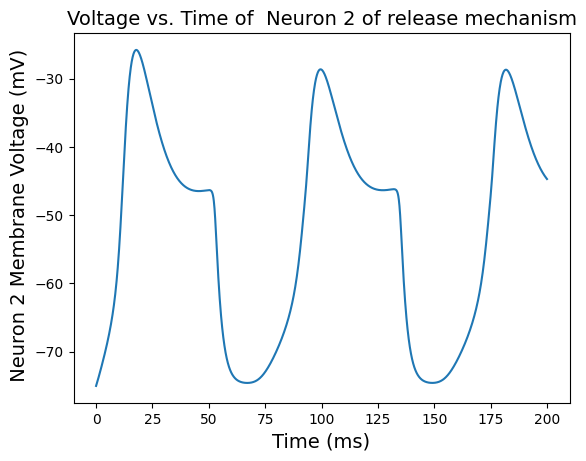

In [3]:
plt.plot(t,V_2)
plt.ylabel(' Neuron 2 Membrane Voltage (mV)',fontsize=14)
plt.xlabel('Time (ms)',fontsize=14)
plt.title('Voltage vs. Time of  Neuron 2 of release mechanism',fontsize=14)

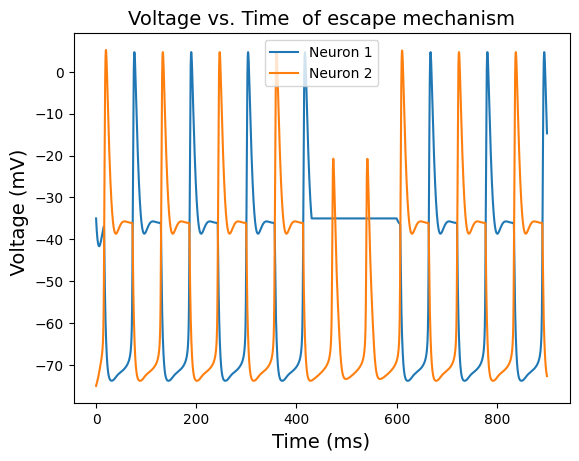

In [4]:
import matplotlib.pyplot as plt

C=1.0
g_PIR=1.0
V_PIR=120
g_L=0.1
V_L=-60
g_SYN=0.3
theta=-44
k=2
V_SYN=-80
phi= 3
#initial conditions



tfinal=900.0
tstep=0.1
V_1=np.zeros(int(tfinal/tstep))
V_2=np.zeros(int(tfinal/tstep))
h_1=np.zeros(int(tfinal/tstep))
h_2=np.zeros(int(tfinal/tstep))

V_1[0]=-35
V_2[0]=-75
h_1[0]=0
h_2[0]=0.25

t=np.arange(0,tfinal,tstep)

for i in range(len(t)-1):
    [h_1[i+1],V_1[i+1]]=alterfiring_neuron1(C,g_PIR,V_1[i],V_2[i],h_1[i],V_PIR,g_L,V_L,g_SYN,V_SYN,theta,k,phi,tstep)
    V_1[(430<=t)&(t<600)]=-35
    [h_2[i+1],V_2[i+1]]=alterfiring_neuron2(C,g_PIR,V_1[i],V_2[i],h_2[i],V_PIR,g_L,V_L,g_SYN,V_SYN,theta,k,phi,tstep)
plt.plot(t,V_1,label='Neuron 1')
plt.plot(t,V_2,label='Neuron 2')
plt.ylabel('  Voltage (mV)',fontsize=14)
plt.xlabel('Time (ms)',fontsize=14)
plt.title('Voltage vs. Time  of escape mechanism',fontsize=14)
plt.legend()


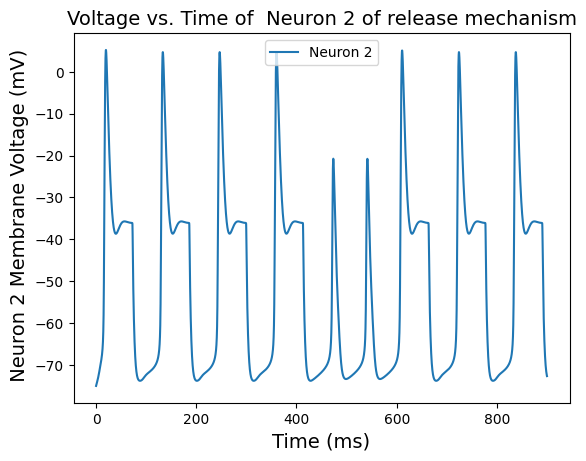

In [5]:
plt.plot(t,V_2,label='Neuron 2')
plt.ylabel(' Neuron 2 Membrane Voltage (mV)',fontsize=14)
plt.xlabel('Time (ms)',fontsize=14)
plt.title('Voltage vs. Time of  Neuron 2 of release mechanism',fontsize=14)
plt.legend()

In [6]:
import numpy as np

def m(V):
    x=1/(1+np.exp(-(V+65)/7.8))
    return x
def hinfinity(V):
    x= 1/(1+np.exp((V+81)/11))
    return x
def tao(V):
    x= hinfinity(V)*np.exp((V+162.3)/17.8)
    return x
def S(V, theta,k):
    x= 1/(1+np.exp(-(V-theta)/k))
    return x
def hdot(V,phi,h):
    x= phi*(hinfinity(V)-h)/tao(V)
    return x
def Vdot(C,g_PIR,V,h,V_PIR,g_L,V_L,g_SYN,s,V_SYN,I):
    x= (-g_PIR*m(V)**3*h*(V-V_PIR)-g_L*(V-V_L)-g_SYN*s*(V-V_SYN)+I)/C
    return x
def alterfiring_neuron1(C,g_PIR,V1,V2,h1,V_PIR,g_L,V_L,g_SYN,V_SYN,theta,k,phi,I,tstep):
    s=S(V2,theta,k)
    hk1=hdot(V1,phi,h1)
    Vk1=Vdot(C,g_PIR,V1,h1,V_PIR,g_L,V_L,g_SYN,s,V_SYN,I)
    h_new=h1+tstep*hk1
    V_new=V1+tstep*Vk1
    return h_new,V_new
def alterfiring_neuron2(C,g_PIR,V1,V2,h2,V_PIR,g_L,V_L,g_SYN,V_SYN,theta,k,phi,I,tstep):
    s=S(V1,theta,k)
    hk1=hdot(V2,phi,h2)
    Vk1=Vdot(C,g_PIR,V2,h2,V_PIR,g_L,V_L,g_SYN,s,V_SYN,I)
    h_new=h2+tstep*hk1
    V_new=V2+tstep*Vk1
    return h_new,V_new


Text(0.5, 1.0, 'Voltage vs. Time of Neuron 1 of release mechanism')

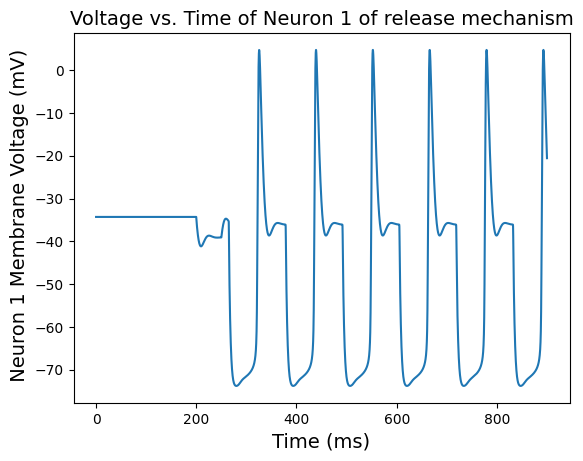

In [7]:
import matplotlib.pyplot as plt

C=1.0
g_PIR=1.0
V_PIR=120
g_L=0.1
V_L=-60
g_SYN=0.3
theta=-44
k=2
V_SYN=-80
phi= 3
#initial conditions



tfinal=900.0
tstep=0.1
V_1=np.zeros(int(tfinal/tstep))
V_2=np.zeros(int(tfinal/tstep))
h_1=np.zeros(int(tfinal/tstep))
h_2=np.zeros(int(tfinal/tstep))
I=np.zeros(int(tfinal/tstep))

V_1[0]=-34.3
V_2[0]=-50.5
h_1[0]=0.0141
h_2[0]=0.0587

t=np.arange(0,tfinal,tstep)

for i in range(len(t)-1):
    V_1[(0<=t)&(t<200)]=-34.3
    V_2[(0<=t)&(t<200)]=-50.5
    I[(0<=t)&(t<200)]=0
    I[(200<=t)&(t<250)]=-1
    I[(t>250)]=0
    [h_1[i+1],V_1[i+1]]=alterfiring_neuron1(C,g_PIR,V_1[i],V_2[i],h_1[i],V_PIR,g_L,V_L,g_SYN,V_SYN,theta,k,phi,I[i],tstep)
    [h_2[i+1],V_2[i+1]]=alterfiring_neuron2(C,g_PIR,V_1[i],V_2[i],h_2[i],V_PIR,g_L,V_L,g_SYN,V_SYN,theta,k,phi,I[i],tstep)
plt.plot(t,V_1)
plt.ylabel(' Neuron 1 Membrane Voltage (mV)',fontsize=14)
plt.xlabel('Time (ms)',fontsize=14)
plt.title('Voltage vs. Time of Neuron 1 of release mechanism',fontsize=14)


Text(0.5, 1.0, 'Voltage vs. Time of  Neuron 2 of release mechanism')

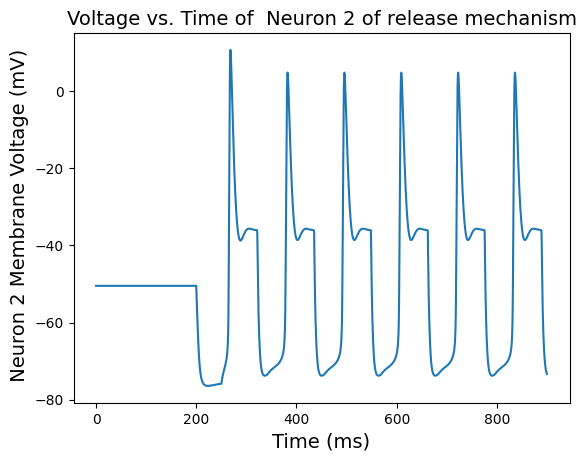

In [8]:
plt.plot(t,V_2)
plt.ylabel(' Neuron 2 Membrane Voltage (mV)',fontsize=14)
plt.xlabel('Time (ms)',fontsize=14)
plt.title('Voltage vs. Time of  Neuron 2 of release mechanism',fontsize=14)

In [9]:
import numpy as np

def m(V):
    x=1/(1+np.exp(-(V+65)/7.8))
    return x
def hinfinity(V):
    x= 1/(1+np.exp((V+81)/11))
    return x
def tao(V):
    x= hinfinity(V)*np.exp((V+162.3)/17.8)
    return x
def S(V, theta,k):
    x= 1/(1+np.exp(-(V-theta)/k))
    return x
def hdot(V,phi,h):
    x= phi*(hinfinity(V)-h)/tao(V)
    return x
def Vdot(C,g_PIR,V,h,V_PIR,g_L,V_L,g_SYN,s,V_SYN,I):
    x= (-g_PIR*m(V)**3*h*(V-V_PIR)-g_L*(V-V_L)-g_SYN*s*(V-V_SYN)+I)/C
    return x
def sdot(V, theta,k,kr,s):
    x= (S(V, theta,k)*(1-s))-kr*s
    return x
def alterfiring_neuron1(C,g_PIR,V1,V2,h1,V_PIR,g_L,V_L,g_SYN,V_SYN,theta,k,phi,tstep,kr,s1,I):
    sk1=sdot(V2, theta,k,kr,s1)
    hk1=hdot(V1,phi,h1)
    s_new=s1+tstep*sk1
    Vk1=Vdot(C,g_PIR,V1,h1,V_PIR,g_L,V_L,g_SYN,s_new,V_SYN,I)
    h_new=h1+tstep*hk1
    V_new=V1+tstep*Vk1
    return h_new,V_new,s_new
def alterfiring_neuron2(C,g_PIR,V1,V2,h2,V_PIR,g_L,V_L,g_SYN,V_SYN,theta,k,phi,tstep,kr,s2,I):
    sk1=sdot(V1, theta,k,kr,s2)
    hk1=hdot(V2,phi,h2)
    s_new=s2+tstep*sk1
    Vk1=Vdot(C,g_PIR,V2,h2,V_PIR,g_L,V_L,g_SYN,s2,V_SYN,I)
    h_new=h2+tstep*hk1
    V_new=V2+tstep*Vk1
    return h_new,V_new,s_new

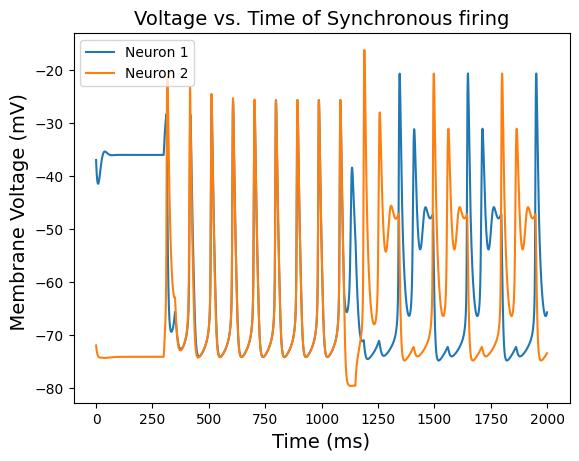

In [10]:
import matplotlib.pyplot as plt

C=1.0
g_PIR=0.5
V_PIR=120
g_L=0.05
V_L=-60
g_SYN=0.2
theta=-35
k=2
V_SYN=-80
phi= 2
kr=0.005
#initial conditions



tfinal=2000.0
tstep=0.1

V_1=np.zeros(int(tfinal/tstep))
V_2=np.zeros(int(tfinal/tstep))
h_1=np.zeros(int(tfinal/tstep))
h_2=np.zeros(int(tfinal/tstep))
s_1=np.zeros(int(tfinal/tstep))
s_2=np.zeros(int(tfinal/tstep))
I=np.zeros(int(tfinal/tstep))
V_1[0]=-37
V_2[0]=-72
h_1[0]=0
h_2[0]=0.25
s_1[0]=0
s_2[0]=1



t=np.arange(0,tfinal,tstep)
for i in range(len(t)-1):
  I[(0<=t)]=0
  I[(300<=t)&(t<350)]=1
  I[(1100<=t)&(t<1150)]=1
  [h_1[i+1],V_1[i+1],s_1[i+1]]=alterfiring_neuron1(C,g_PIR,V_1[i],V_2[i],h_1[i],V_PIR,g_L,V_L,g_SYN,V_SYN,theta,k,phi,tstep,kr,s_1[i],I[i])
  I[(1100<=t)&(t<1150)]=-1
  [h_2[i+1],V_2[i+1],s_2[i+1]]=alterfiring_neuron2(C,g_PIR,V_1[i],V_2[i],h_2[i],V_PIR,g_L,V_L,g_SYN,V_SYN,theta,k,phi,tstep,kr,s_2[i],I[i])

plt.plot(t,V_1,label='Neuron 1')
plt.plot(t,V_2,label='Neuron 2')
plt.ylabel('  Membrane Voltage (mV)',fontsize=14)
plt.xlabel('Time (ms)',fontsize=14)
plt.title('Voltage vs. Time of Synchronous firing',fontsize=14)
plt.legend()

Text(0.5, 1.0, 'Voltage vs. Time of  Neuron 2 of release mechanism')

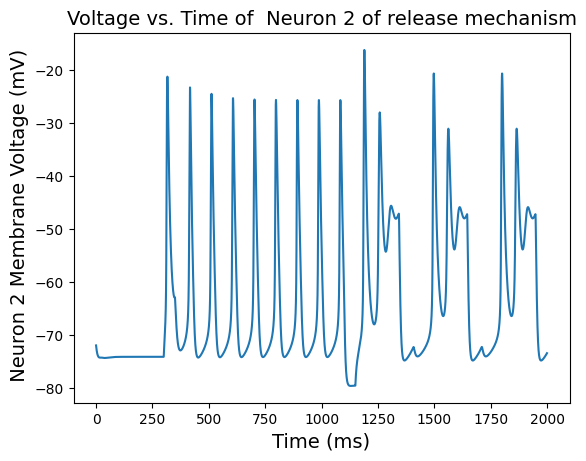

In [11]:
plt.plot(t,V_2)
plt.ylabel(' Neuron 2 Membrane Voltage (mV)',fontsize=14)
plt.xlabel('Time (ms)',fontsize=14)
plt.title('Voltage vs. Time of  Neuron 2 of release mechanism',fontsize=14)